<a href="https://colab.research.google.com/github/satoshi-yoshiji/HGEN670course_2025/blob/main/association_study_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Toy Dataset:
    genotype  age  sex      pqtl
0          0   35    1  1.430263
1          2   67    0  4.404672
2          1   20    1  3.224319
3          1   38    0  2.503785
4          2   55    0  4.387030
5          2   44    1  3.672715
6          2   69    0  4.180139
7          1   49    1  2.760290
8          1   39    1  3.155682
9          2   39    1  4.111990
10         0   34    1  1.346318
11         1   59    1  2.816738
12         0   52    1  2.059856
13         1   21    0  2.771039
14         2   29    1  4.712697
15         2   52    1  4.486014
16         0   51    0  2.237995
17         2   30    0  4.823390
18         0   43    1  1.317833
19         0   55    0  1.160611
20         1   31    0  2.823186
21         1   48    1  2.629626
22         0   54    1  1.162489
23         0   20    0  1.433608
24         2   20    1  4.809901
25         0   56    0  2.395584
26         0   25    0  1.585500
27         2   58    1  3.637164
28         1   60    0  3.0803

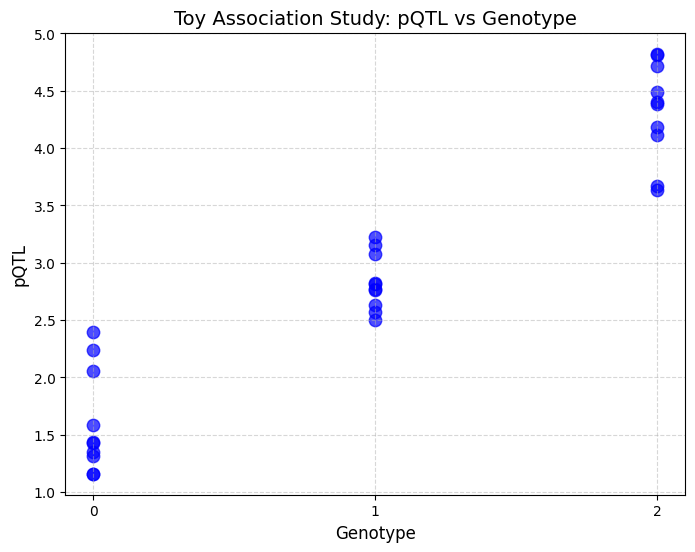

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn  # This imports the scikit-learn library
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

# Set random seed for reproducibility
np.random.seed(0)

# ---------------------------
# Step 1: Create the dataset
# ---------------------------

# Create 30 individuals with equal counts for genotype 0, 1, and 2.
n_per_group = 10
genotypes = np.array([0] * n_per_group + [1] * n_per_group + [2] * n_per_group)
# Shuffle to mix the order of individuals
np.random.shuffle(genotypes)

n_individuals = len(genotypes)

# Generate covariates:
# Age: random integer ages between 20 and 70
age = np.random.randint(20, 70, size=n_individuals)
# Sex: binary variable 0 or 1
sex = np.random.choice([0, 1], size=n_individuals)

# Define base pQTL values for each genotype:
# Genotype 0 -> 1.5, Genotype 1 -> 3.0, Genotype 2 -> 4.5
base_values = {0: 1.5, 1: 3.0, 2: 4.5}
base_pqtl = np.array([base_values[g] for g in genotypes])

# Add normally distributed noise (e.g., std = 0.5) to pQTL outcome
noise_std = 0.5
noise = noise_std * np.random.randn(n_individuals)
pqtl = base_pqtl + noise

# Build a DataFrame to hold our data
df = pd.DataFrame({
    'genotype': genotypes,
    'age': age,
    'sex': sex,
    'pqtl': pqtl
})

print("Toy Dataset:")
print(df)

# -------------------------------------------
# Step 2: Visualize the pQTL vs Genotype Data
# -------------------------------------------

plt.figure(figsize=(8, 6))
plt.scatter(df['genotype'], df['pqtl'], color='blue', s=80, alpha=0.7)
plt.xlabel("Genotype", fontsize=12)
plt.ylabel("pQTL", fontsize=12)
plt.title("Toy Association Study: pQTL vs Genotype", fontsize=14)
plt.xticks([0, 1, 2])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [3]:
# ----------------------------------------------------------
# Additional Analysis: Sex x Genotype Association and Age Distribution
# ----------------------------------------------------------

# Table: Sex x Genotype association using a crosstab
sex_genotype_table = pd.crosstab(df['genotype'], df['sex'], margins=True)
print("\nSex x Genotype Association Table:")
print(sex_genotype_table)

# Table: Distribution of age per each genotype
age_distribution = df.groupby('genotype')['age'].describe()
print("\nAge Distribution per Genotype:")
print(age_distribution)


Sex x Genotype Association Table:
sex        0   1  All
genotype             
0          5   5   10
1          5   5   10
2          4   6   10
All       14  16   30

Age Distribution per Genotype:
          count  mean        std   min    25%   50%    75%   max
genotype                                                        
0          10.0  42.5  13.226657  20.0  34.25  47.0  53.50  56.0
1          10.0  40.2  13.990473  20.0  32.50  38.5  48.75  60.0
2          10.0  46.3  16.680328  20.0  32.25  48.0  57.25  69.0


In [2]:
# ------------------------------------------------
# Step 3: Perform Association Analysis (Regression)
# ------------------------------------------------

# Option 1: Using statsmodels to get a detailed summary
model = smf.ols(formula='pqtl ~ genotype + age + sex', data=df).fit()
print("\nStatsmodels OLS Regression Results:")
print(model.summary())

# Option 2: Using scikit-learn's LinearRegression
X = df[['genotype', 'age', 'sex']]
y = df['pqtl']
lr = LinearRegression().fit(X, y)
print("\nScikit-learn Linear Regression Results:")
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)


Statsmodels OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                   pqtl   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     79.67
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           3.11e-13
Time:                        08:21:29   Log-Likelihood:                -12.371
No. Observations:                  30   AIC:                             32.74
Df Residuals:                      26   BIC:                             38.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      